### Test - Denoising using wavelet threshold

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
hilal = misc.imread('hilal2.png')

In [3]:
print type(hilal)
print hilal.shape, hilal.dtype

<type 'numpy.ndarray'>
(480, 639, 3) uint8


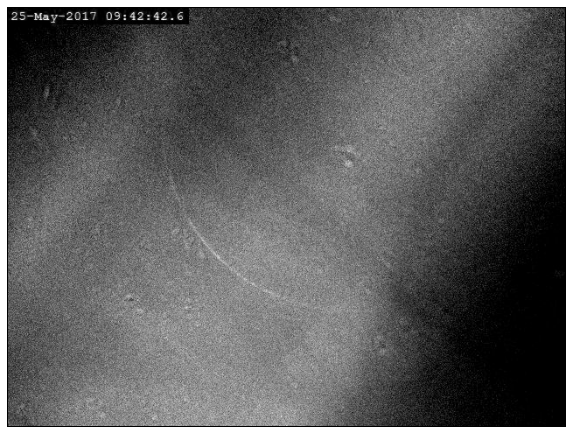

In [4]:
plt.figure(figsize=(10,8))
plt.imshow(hilal[:,:,0], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

#### 2d a'trous wavelet transform with B3-spline scaling function

In [5]:
from wavelet import wt
wt = wt(verbose=True)

In [6]:
plane = wt.atrous(hilal[:,:,0], 6)

##WT--A Trous--Plane: 6
##WT--A Trous--Plane: 5
##WT--A Trous--Plane: 4
##WT--A Trous--Plane: 3
##WT--A Trous--Plane: 2
##WT--A Trous--Plane: 1
##WT--A Trous--Plane: 0


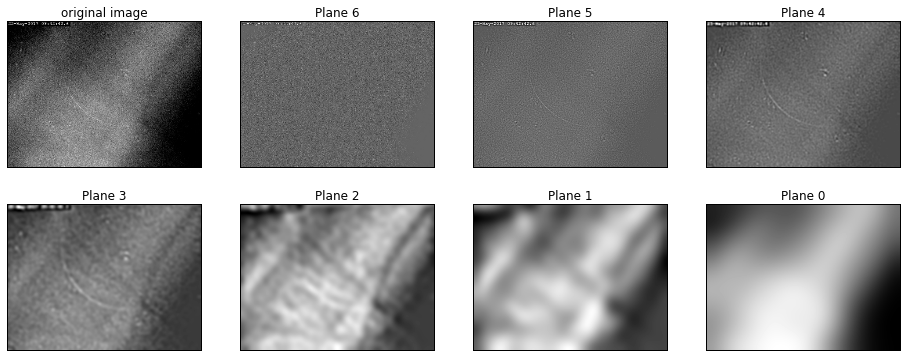

In [7]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(hilal[:,:,0], cmap=plt.cm.gray)
plt.title("original image")
plt.xticks([]), plt.yticks([])

for i,lvl in enumerate(plane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl, cmap=plt.cm.gray)
    plt.title("Plane "+ str(6-i))
    plt.xticks([]), plt.yticks([])

plt.show()

#### Filter each plane with a threshold 

threshold is multiple of sigma in each plane, 0 if abs(pixel) < threshold*sigma

In [12]:
filteredplane = wt.filtering(plane, threshold=2.5, mask=(0, 725, 0, 1080))

#WT-- Image Filtering
#WT-- Filtering to be checked
##WT--Plane 6 Sigma = 1.536649e+01
##WT--Pixel filtered : 301774
##WT--Plane 5 Sigma = 4.787800e+00
##WT--Pixel filtered : 290838
##WT--Plane 4 Sigma = 4.082497e+00
##WT--Pixel filtered : 251365
##WT--Plane 3 Sigma = 3.888961e+00
##WT--Pixel filtered : 220811
##WT--Plane 2 Sigma = 3.939228e+00
##WT--Pixel filtered : 228821
##WT--Plane 1 Sigma = 4.526243e+00
##WT--Pixel filtered : 267464


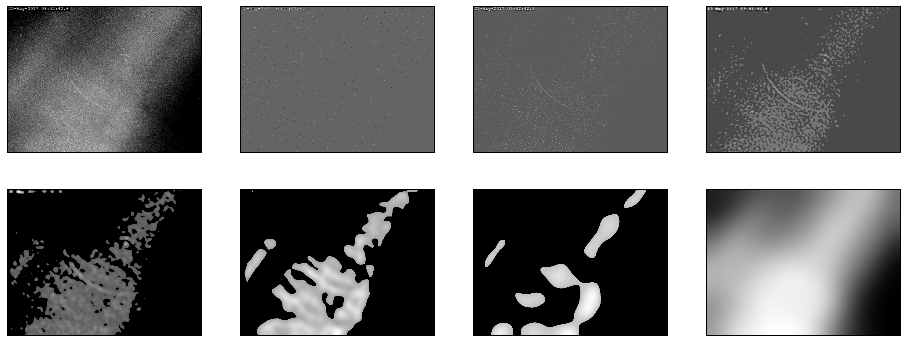

In [13]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(hilal[:,:,0], cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])

for i,lvl in enumerate(filteredplane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl, cmap=plt.cm.gray)
    plt.xticks([]), plt.yticks([])

plt.show()

In [14]:
filtered = wt.restore(filteredplane, 0, 6)

##WT--Restore-plane: 0 to 6
##WT--Restore-plane: 0
##WT--Restore-plane: 1
##WT--Restore-plane: 2
##WT--Restore-plane: 3
##WT--Restore-plane: 4
##WT--Restore-plane: 5
##WT--Restore-plane: 6


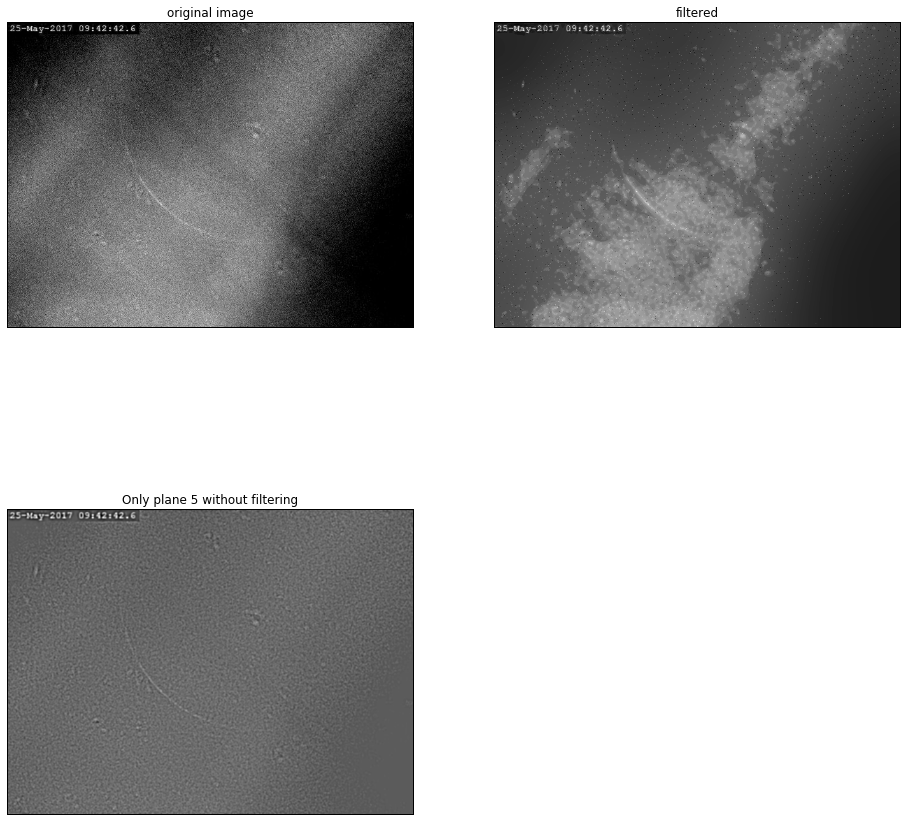

In [15]:
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.imshow(hilal[:,:,0], cmap=plt.cm.gray)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.title("filtered")
plt.imshow(filtered, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.title("Only plane 5 without filtering")
plt.imshow(plane[1], cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])

plt.show()